In [1]:
import pandas as pd
import numpy as np

In [2]:
matches=pd.read_csv('matches.csv')

In [3]:
deliveries=pd.read_csv('deliveries.csv')

In [4]:
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [5]:
totat_score_df = deliveries.groupby(['match_id','inning']).sum()['total_runs'].reset_index()

In [6]:
totat_score_df=totat_score_df[totat_score_df['inning']==1]
totat_score_df

,match_id,inning,total_runs
0,1,1,207
2,2,1,184
4,3,1,183
6,4,1,163
8,5,1,157
...,...,...,...
1518,11347,1,143
1520,11412,1,136
1522,11413,1,171
1524,11414,1,155


In [7]:
match_df  =  matches.merge(totat_score_df,left_on='id',right_on='match_id')

In [8]:
match_df['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [9]:
match_df['team1']=match_df['team1'].replace('Deccan Chargers','Sunrisers Hyderabad')
match_df['team2']=match_df['team2'].replace('Deccan Chargers','Sunrisers Hyderabad')

In [10]:
match_df['team1']=match_df['team1'].replace('Delhi Daredevils','Delhi Capitals')
match_df['team2']=match_df['team2'].replace('Deccan Chargers','Delhi Capitals')

In [11]:
teams=['Sunrisers Hyderabad','Mumbai Indians','Royal Challengers Bangalore','Kolkata Knight Riders', 'Kings XI Punjab','Chennai Super Kings', 'Rajasthan Royals','Delhi Capitals']

In [12]:
match_df=match_df[match_df['team1'].isin(teams)]
match_df=match_df[match_df['team2'].isin(teams)]

In [13]:
match_df

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,...,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,inning,total_runs
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,1,207
6,7,IPL-2017,Mumbai,09-04-2017,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,...,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan,NaN,7,1,178
7,8,IPL-2017,Indore,10-04-2017,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore,bat,normal,0,...,0,8,AR Patel,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,8,1,148
9,10,IPL-2017,Mumbai,12-04-2017,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,...,0,4,JJ Bumrah,Wankhede Stadium,Nitin Menon,CK Nandan,NaN,10,1,158
10,11,IPL-2017,Kolkata,13-04-2017,Kings XI Punjab,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,...,0,8,SP Narine,Eden Gardens,A Deshmukh,NJ Llong,NaN,11,1,170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,IPL-2019,Mumbai,05-05-2019,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,...,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi,11347,1,143
752,11412,IPL-2019,Chennai,07-05-2019,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,...,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould,11412,1,136
753,11413,IPL-2019,Visakhapatnam,08-05-2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,...,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN,11413,1,171
754,11414,IPL-2019,Visakhapatnam,10-05-2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,...,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin,11414,1,155


In [14]:
match_df=match_df[match_df['dl_applied']==0]

In [15]:
match_df=match_df[['match_id','city','winner','total_runs']]

In [16]:
deleivey_df=match_df.merge(deliveries,on='match_id')

In [17]:
deleivey_df=deleivey_df[deleivey_df['inning']==2]

In [18]:
deleivey_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,0,0,0,1,0,1,NaN,NaN,NaN
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,0,0,0,NaN,NaN,NaN
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,0,0,0,NaN,NaN,NaN
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,0,0,0,2,0,2,NaN,NaN,NaN
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,0,0,0,4,0,4,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130790,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,0,0,0,0,1,0,1,NaN,NaN,NaN
130791,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,0,0,0,0,2,0,2,NaN,NaN,NaN
130792,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
130793,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,0,0,0,0,2,0,2,NaN,NaN,NaN


In [19]:
deleivey_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,0,0,0,1,0,1,NaN,NaN,NaN
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,0,0,0,NaN,NaN,NaN
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,0,0,0,NaN,NaN,NaN
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,0,0,0,2,0,2,NaN,NaN,NaN
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,0,0,0,4,0,4,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130790,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,0,0,0,0,1,0,1,NaN,NaN,NaN
130791,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,0,0,0,0,2,0,2,NaN,NaN,NaN
130792,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
130793,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,0,0,0,0,2,0,2,NaN,NaN,NaN


In [20]:
deleivey_df['current_score']=deleivey_df.groupby('match_id')['total_runs_y'].cumsum()

In [21]:
deleivey_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,0,0,1,0,1,NaN,NaN,NaN,1
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,0,0,NaN,NaN,NaN,1
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,0,0,NaN,NaN,NaN,1
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,0,0,2,0,2,NaN,NaN,NaN,3
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,0,0,4,0,4,NaN,NaN,NaN,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130790,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,0,0,0,1,0,1,NaN,NaN,NaN,152
130791,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,0,0,0,2,0,2,NaN,NaN,NaN,154
130792,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,0,0,0,1,0,1,SR Watson,run out,KH Pandya,155
130793,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,0,0,0,2,0,2,NaN,NaN,NaN,157


In [22]:
deleivey_df['run_left']=deleivey_df['total_runs_x']-deleivey_df['current_score']

In [23]:
deleivey_df['balls_left']=126-(deleivey_df['over']*6+deleivey_df['ball'])

In [25]:
deleivey_df['player_dismissed']=deleivey_df['player_dismissed'].fillna(0)
deleivey_df['player_dismissed']=deleivey_df['player_dismissed'].apply(lambda x : x if x== 0 else 1)
deleivey_df['wicket']=deleivey_df.groupby('match_id')['player_dismissed'].cumsum()
deleivey_df['wicket_left']=10-deleivey_df['wicket']

In [26]:
deleivey_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,run_left,balls_left,wicket,wicket_left
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,1,0,NaN,NaN,1,206,119,0,10
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,NaN,NaN,1,206,118,0,10
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,NaN,NaN,1,206,117,0,10
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,2,0,NaN,NaN,3,204,116,0,10
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,4,0,NaN,NaN,7,200,115,0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130790,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,0,1,0,NaN,NaN,152,0,4,5,5
130791,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,0,2,0,NaN,NaN,154,-2,3,5,5
130792,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,0,1,1,run out,KH Pandya,155,-3,2,6,4
130793,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,0,2,0,NaN,NaN,157,-5,1,6,4


In [27]:
deleivey_df['crr']=(deleivey_df['current_score']*6)/(120-deleivey_df['balls_left'])

In [28]:
deleivey_df['rrr']=(deleivey_df['run_left']*6)/(deleivey_df['balls_left'])

In [29]:
deleivey_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 63379 entries, 125 to 130794
Data columns (total 31 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   match_id          63379 non-null  int64  
 1   city              62790 non-null  object 
 2   winner            63352 non-null  object 
 3   total_runs_x      63379 non-null  int64  
 4   inning            63379 non-null  int64  
 5   batting_team      63379 non-null  object 
 6   bowling_team      63379 non-null  object 
 7   over              63379 non-null  int64  
 8   ball              63379 non-null  int64  
 9   batsman           63379 non-null  object 
 10  non_striker       63379 non-null  object 
 11  bowler            63379 non-null  object 
 12  is_super_over     63379 non-null  int64  
 13  wide_runs         63379 non-null  int64  
 14  bye_runs          63379 non-null  int64  
 15  legbye_runs       63379 non-null  int64  
 16  noball_runs       63379 non-null  int64  


In [30]:
def result(row):
    return 1 if row['batting_team'] == row['winner'] else 0


In [31]:
deleivey_df['result']=deleivey_df.apply(result,axis=1)

In [32]:
final_df=deleivey_df[['batting_team','bowling_team','city','run_left','balls_left','wicket_left','total_runs_x','crr','rrr','result']]

In [33]:
final_df=final_df.sample(final_df.shape[0])

In [34]:
final_df.sample()

,batting_team,bowling_team,city,run_left,balls_left,wicket_left,total_runs_x,crr,rrr,result
415,Mumbai Indians,Kolkata Knight Riders,Mumbai,131,85,10,178,8.057143,9.247059,1


In [35]:
final_df.isnull().sum()

batting_team      0
bowling_team      0
city            589
run_left          0
balls_left        0
wicket_left       0
total_runs_x      0
crr               0
rrr               7
result            0
dtype: int64

In [36]:
final_df.dropna(inplace=True)

In [37]:
final_df = final_df[final_df['balls_left']!=0]

In [38]:
#TEST TRAIN SPLIT

In [39]:
X=final_df.iloc[:,:-1]
Y=final_df.iloc[:,-1]

In [40]:
from sklearn.model_selection import train_test_split,RandomizedSearchCV,KFold,GridSearchCV

In [41]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=1)

In [42]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [43]:
trf=ColumnTransformer([('trf',OneHotEncoder(sparse_output=False,drop='first'),['batting_team','bowling_team','city'])],remainder='passthrough')

In [44]:
from sklearn.linear_model import LinearRegression,lasso_path,ridge_regression,LogisticRegression
from sklearn.pipeline import Pipeline

In [45]:
pipe=Pipeline(steps=[('step1',trf),('step2',LogisticRegression(solver='liblinear'))])

In [46]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', LogisticRegression(solver='liblinear'))])

In [47]:
y_pred=pipe.predict(x_test)

In [48]:
from sklearn.metrics import accuracy_score,classification_report

In [49]:
accuracy_score(y_test,y_pred)

0.8061036989694016

In [50]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.78      0.79      5756
           1       0.82      0.83      0.82      6761

    accuracy                           0.81     12517
   macro avg       0.81      0.80      0.80     12517
weighted avg       0.81      0.81      0.81     12517



In [51]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.svm import SVC

In [52]:
pipe_2=Pipeline(steps=[('step1',trf),('step2',RandomForestClassifier(random_state=4))])

In [53]:
pipe_2.fit(x_train,y_train)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', RandomForestClassifier(random_state=4))])

In [54]:
print(classification_report(y_test,pipe_2.predict(x_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5756
           1       1.00      1.00      1.00      6761

    accuracy                           1.00     12517
   macro avg       1.00      1.00      1.00     12517
weighted avg       1.00      1.00      1.00     12517



In [55]:
#pipe_3=Pipeline(steps=[('step1',trf),('step2',RandomForestClassifier(random_state=1))])

In [56]:
#x_train_Lb=pd.get_dummies(x_train[['batting_team','bowling_team','city']],drop_first=True)

In [57]:
#x_test_Lb=pd.get_dummies(x_test[['batting_team','bowling_team','city']],drop_first=True)

In [58]:
#rf_tune=RandomForestClassifier(random_state=1)

In [59]:
#parameter = {'n_estimators':[80,90,100,110],'max_depth':[4,6,8,None],'max_features':['sqrt','log2',None]}

In [60]:
#from sklearn import metrics
#scorer = metrics.make_scorer(metrics.accuracy_score)

In [61]:
#rand_obj = RandomizedSearchCV(rf_tune,parameter,scoring=scorer,cv=3,verbose=2,n_iter=50)

In [62]:
#rand_obj.fit(x_train_Lb,y_train)

In [63]:
#rf_tune=rand_obj.best_estimator_

In [64]:
#rf_tune.fit(x_train_Lb,y_train)

In [65]:
#print(classification_report(y_train,rf_tune.predict(x_train_Lb)))

In [66]:
#print(classification_report(y_test,rf_tune.predict(x_test_Lb)))

In [67]:
#gb_tune =  GradientBoostingClassifier(random_state=1)

In [68]:
#parameter_1={'n_estimators':np.arange(50,200,50),
#                                  'max_depth':[2,4,6,8],'max_features':['sqrt','log2',None],
#                                  'learning_rate':np.arange(.001,.1,.001),'subsample':[.7,.8,.9,1],
 #                                  'min_samples_split':[10,20,50,60,70],'max_leaf_nodes':[50,75,150,200]}

In [69]:
#rand_obj_2 = RandomizedSearchCV(gb_tune,parameter_1,scoring=scorer,cv=3,verbose=2,n_iter=50)

In [70]:
#rand_obj_2.fit(x_train_Lb,y_train)

In [71]:
#gb_tune=rand_obj_2.best_estimator_

In [72]:
#gb_tune.fit(x_train_Lb,y_train)

In [73]:
#print(classification_report(y_train,gb_tune.predict(x_train_Lb)))

In [74]:
#print(classification_report(y_test,gb_tune.predict(x_test_Lb)))

In [75]:
def match_summary(row):
    print("Batting Team-" + row['batting_team'] + " | Bowling Team-" + row['bowling_team'] + " | Target- " + str(row['total_runs_x']))
    

In [76]:
def match_progression(x_df,match_id,pipe):
    match = x_df[x_df['match_id']==match_id]
    match = match[match['ball']==6]
    temp_df = match[['batting_team','bowling_team','city','run_left','balls_left','wicket_left','total_runs_x','crr','rrr']].dropna()
    temp_df = temp_df[temp_df['balls_left']!=0]
    result = pipe.predict_proba(temp_df)
    temp_df['lose']=  np.round(result.T[0]*100,1)
    temp_df['win']=  np.round(result.T[1]*100,1)
    temp_df['end_of_over'] = range(1,temp_df.shape[0]+1)
    
    target = temp_df['total_runs_x'].values[0]
    run    =  list(temp_df['run_left'].values)
    new_runs = run[:]
    run.insert(0,target)
    temp_df['runs_after_over']= np.array(run[:-1])-np.array(new_runs)
    wickets = list(temp_df['wicket_left'].values)
    new_wickets = wickets[:]
    new_wickets.insert(0,10)
    wickets.append(0)
    w = np.array(wickets)
    nw = np.array(new_wickets)
    temp_df['wickets_in_over'] = (nw - w)[0:temp_df.shape[0]]
    
    print("Target-",target)
    temp_df = temp_df[['end_of_over','runs_after_over','wickets_in_over','lose','win']]
    return temp_df,target 
    
    
    
    

    

In [84]:
temp_df,target = match_progression(deleivey_df,111,pipe)
temp_df

Target- 156


,end_of_over,runs_after_over,wickets_in_over,lose,win
15605,1,3,0,41.5,58.5
15612,2,8,0,36.4,63.6
15618,3,6,0,34.9,65.1
15624,4,9,1,43.9,56.1
15630,5,5,0,43.9,56.1
15636,6,2,1,63.6,36.4
15642,7,10,0,56.4,43.6
15648,8,11,0,47.4,52.6
15654,9,3,0,50.4,49.6
15660,10,5,0,50.5,49.5


In [78]:
import matplotlib.pyplot as plt


Text(0.5, 1.0, 'Target-198')

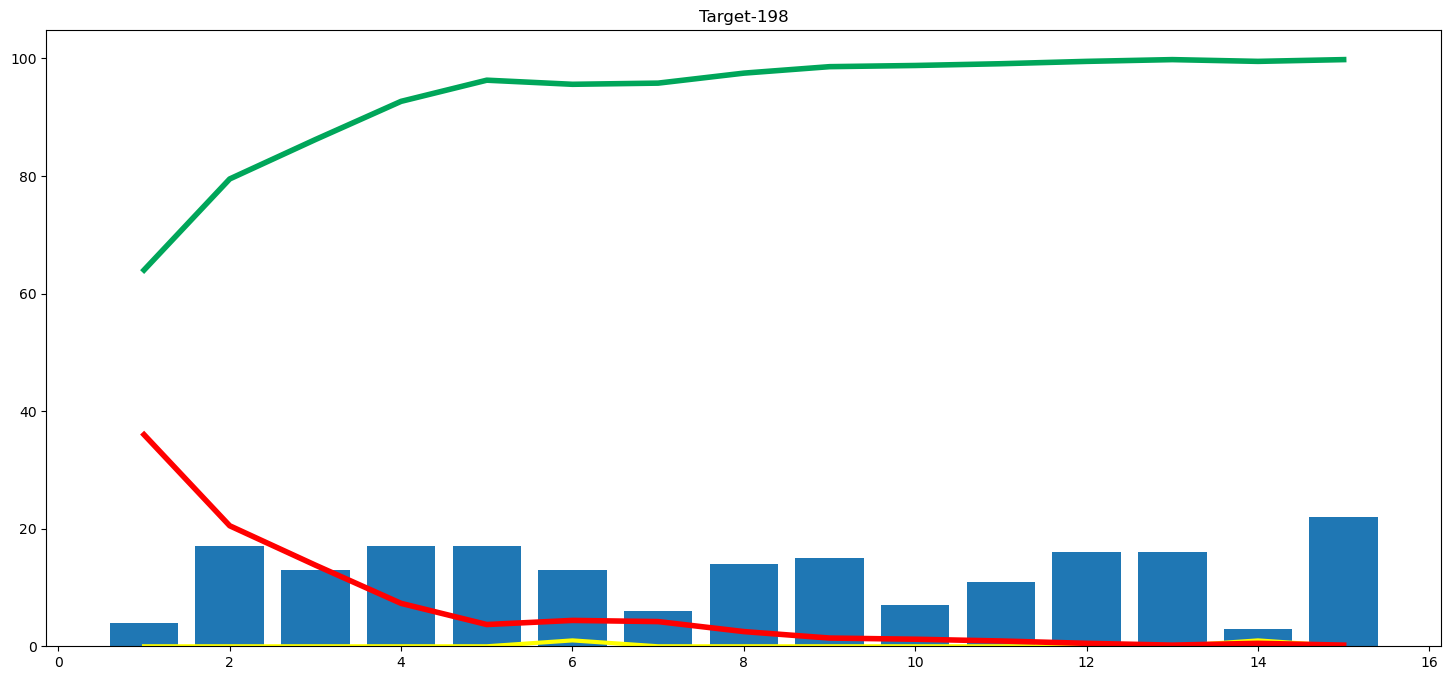

In [79]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,8))
plt.plot(temp_df['end_of_over'],temp_df['wickets_in_over'],color='yellow',linewidth=3)
plt.plot(temp_df['end_of_over'],temp_df['win'],color='#00a65a',linewidth=4)
plt.plot(temp_df['end_of_over'],temp_df['lose'],color='red',linewidth=4)
plt.bar(temp_df['end_of_over'],temp_df['runs_after_over'])
plt.title('Target-' + str(target))

In [80]:
import pickle
pickle.dump(pipe,open('pipe.pkl','wb'))

In [81]:
teams

['Sunrisers Hyderabad',
 'Mumbai Indians',
 'Royal Challengers Bangalore',
 'Kolkata Knight Riders',
 'Kings XI Punjab',
 'Chennai Super Kings',
 'Rajasthan Royals',
 'Delhi Capitals']

In [83]:
deleivey_df['city'].unique()

array(['Hyderabad', 'Mumbai', 'Indore', 'Kolkata', 'Bangalore', 'Delhi',
       'Chandigarh', 'Jaipur', 'Chennai', 'Cape Town', 'Port Elizabeth',
       'Durban', 'Centurion', 'East London', 'Johannesburg', 'Kimberley',
       'Bloemfontein', 'Cuttack', 'Ahmedabad', 'Nagpur', 'Dharamsala',
       'Visakhapatnam', 'Ranchi', 'Abu Dhabi', 'Sharjah', nan, 'Pune',
       'Raipur', 'Mohali', 'Bengaluru'], dtype=object)

In [88]:
result=pipe.predict_proba(x_train)

In [90]:
result[255][1]

0.47904128427687565